from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit import Aer, execute
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

def qft(circ, q, d):
    for j in range(d):
        circ.h(q[j])
        for k in range(j+1,d):
            circ.cu1(math.pi/float(2**(k-j)), q[k], q[j])
def qftinv(circ, q, d):
# circ is QuantumCircuit Object, q is QuantumRegister object, d is the number.
    for j in range(d):
        circ.h(q[j])
        for k in range(j+1,d):
            circ.cu1(math.pi/float(2**(j-k)), q[k], q[j])
            
def Generate_Jordan_Circuit(circuit, n, n0, d):
    input_registers = list(QuantumRegister(n) for i in range(d))
    output_register = QuantumRegister(n0)
    classical_register = ClassicalRegister(d*n)
    tmp = input_registers.copy()
    tmp.append(output_register)
    tmp.append(classical_register)
    circuit = QuantumCircuit(*tmp)
    return circuit
        
# define the number of qubits
n = 3
# instantiate a QuantumCircuit object with the required number of qubits
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr, cr)
qc = Generate_Jordan_Circuit(qc, n, n+3, 2)
# add the gates in their corresponding places as shown in the figure
qft(qc, qr, n)
# call the draw method to plot the circuit
qc.draw("mpl")
# instatiate the Statevector object using the given input qubits
sv = Statevector.from_label("001")
# evolve the Statevector object by passing on the QuantumCircuit object defined in part 2
new_sv = sv.evolve(qc)
# plot the qsphere using the data from the Statevector object

print(sv.to_dict(2))
d = new_sv.to_dict()
j=2
for i in d:
    d[i] = d[i].round(j)
print(d)
qc.draw("mpl")

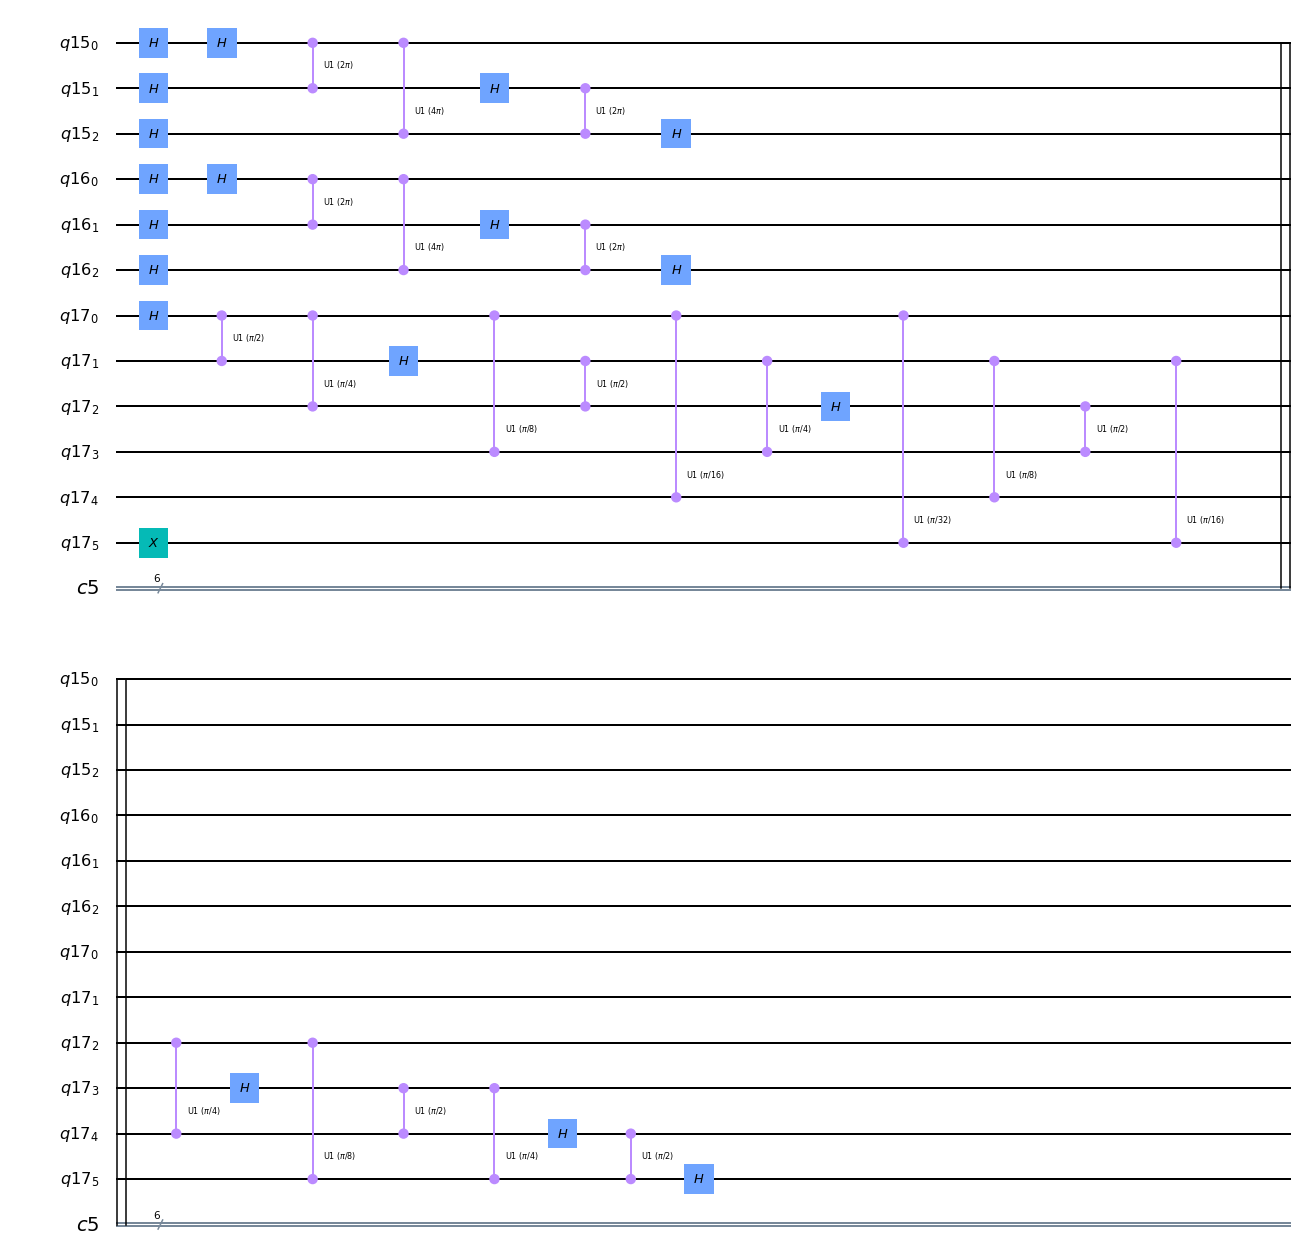

In [13]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit import Aer, execute
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

def qft(circ, q, d):
# circ is QuantumCircuit Object, q is QuantumRegister object, d is the number.
    for j in range(d):
        circ.h(q[j])
        for k in range(j+1,d):
            circ.cu1(math.pi/float(2**(k-j)), q[k], q[j])
def qftinv(circ, q, d):
# circ is QuantumCircuit Object, q is QuantumRegister object, d is the number.
    for j in range(d):
        circ.h(q[j])
        for k in range(j+1,d):
            circ.cu1(math.pi/float(2**(j-k)), q[k], q[j])
            
def Generate_Jordan_Circuit(circuit, n, n0, d):
    i_r = list(QuantumRegister(n) for i in range(d))
    i_r.append(QuantumRegister(n0))
    i_r.append(ClassicalRegister(d*n))
    circuit = QuantumCircuit(*i_r)
    o_r = list(i_r.pop(d))
    c_r = list(i_r.pop(d))
    for i in range(d):
        for j in range(n):
            circuit.h(i_r[i][j])
    circuit.x(o_r[n0-1])
    qft(circuit, o_r, n0)
    for i in range(d):
        qftinv(circuit, i_r[i], n)
    return circuit
        
# define the number of qubits
n = 3
# instantiate a QuantumCircuit object with the required number of qubits
qc = QuantumCircuit(1)
qc = Generate_Jordan_Circuit(qc, n, n+3, 2)
# add the gates in their corresponding places as shown in the figure
#qft(qc, qr, n)
# call the draw method to plot the circuit
qc.draw("mpl")
# instatiate the Statevector object using the given input qubits
#sv = Statevector.from_label("001")
# evolve the Statevector object by passing on the QuantumCircuit object defined in part 2
#new_sv = sv.evolve(qc)
# plot the qsphere using the data from the Statevector object

#print(sv.to_dict(2))
#d = new_sv.to_dict()
j=2
#for i in d:
#    d[i] = d[i].round(j)
#print(d)
qc.draw("mpl")